# Modelos de Regresion lineal
## Modelo con datos simulados

Vamos a crear una distribución simulada de datos:

```latex notation````
\begin{equation}
y_e=\alpha+\beta x
\\ \text{Donde }\alpha=5,\\beta=1.9\text{ y x son 100 valores distribuidos según una N(1.5, 2.5)}
\\y_e=5+0.8 x+\epsilon
\\ \text{Donde }\epsilon \text{ será el error y también estará distribuido como una normal pero de media 0 para no desplazar el modelo N(0, 0.8)}
\end{equation}



### Al lio
First, the libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image # para incluir imagenes local

Ahora creamos la sitribución aleatoria

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FED8EC5548>,
      dtype=object)

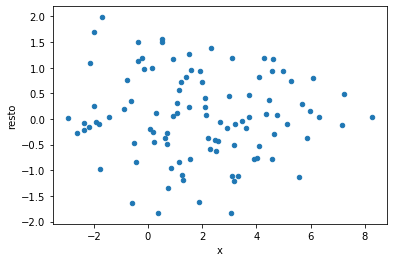

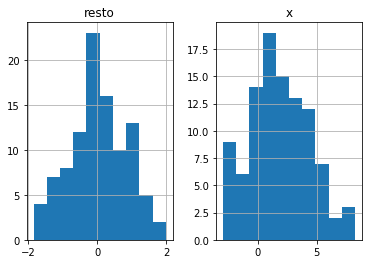

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)
resto = 0 + 0.8 * np.random.randn(100)
df = pd.DataFrame({'x':x, 'resto':resto})
df.plot('x', 'resto', kind='scatter')
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FED9095A08>,
      dtype=object)

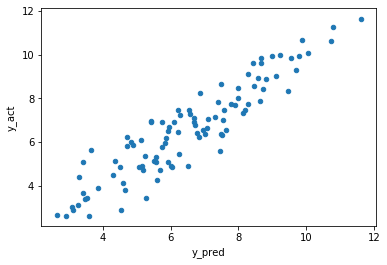

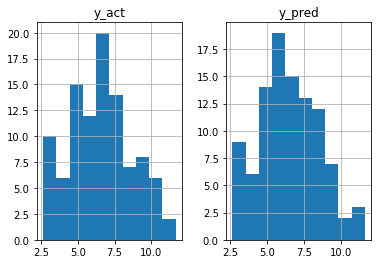

In [4]:

y_pred = 5 + 0.8*x
y_act =  5 + 0.8*x + resto
ydf = pd.DataFrame({'y_pred':y_pred, 'y_act':y_act})
ydf.plot ('y_pred',  'y_act', kind='scatter')
ydf.hist()

In [5]:
data = pd.DataFrame({
    "x":x,
    "y_act":y_act,
    "y_pred":y_pred
})

In [6]:
data.head()

,x,y_act,y_pred
0,0.864627,4.737747,5.691702
1,2.981808,7.843761,7.385447
2,1.501538,6.435839,6.201230
3,2.593763,6.654989,7.075010
4,-0.231420,6.004014,4.814864


relleno un array igual de largo que el resto (100) con todos los datos la media de Y_act para pintarla

In [7]:
 
 y_mean = [np.mean(y_act) for i in range(0, len(y_act))]

 # la añado al data
 data["y_mean"]=y_mean
 data.head()

,x,y_act,y_pred,y_mean
0,0.864627,4.737747,5.691702,6.566755
1,2.981808,7.843761,7.385447,6.566755
2,1.501538,6.435839,6.201230,6.566755
3,2.593763,6.654989,7.075010,6.566755
4,-0.231420,6.004014,4.814864,6.566755


Esto es equivalente a
```` python
for i in range(0, len(y_act)):
    y_mean[i]=np.mean(y_act)

````
O sea creamos un array con 100 veces repetida la media de la distribución para pintarla.

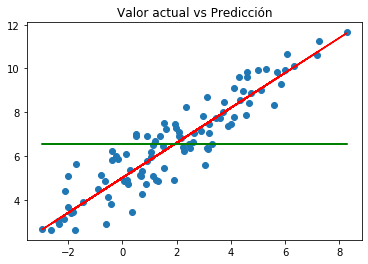

In [8]:
plt.plot(x, y_act, "o")
plt.plot(x, y_pred, color='red')
plt.plot(x,y_mean, "g")
plt.title ("Valor actual vs Predicción")
plt.show()

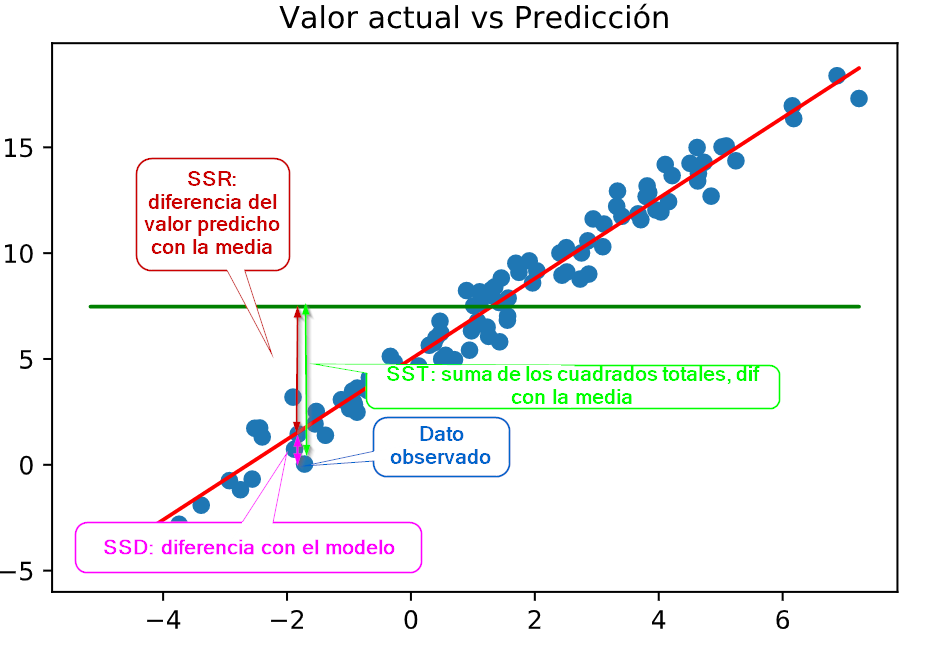

In [9]:
Image("./T4 - 1.png")

La suma de los cuadrados totales deberá coincidir con la suma de los cuadrados de la regresión mas la suma de los cuadrados de la diferencia con el modelo (epsilon, el dato aleatorio que no conocemos)

SST = SSR + SSD

R^2 = SSR/SST (entre 0 y 1) mide la bondad de la regresión lineal


In [10]:
data["SSR"] = (data["y_pred"]-data["y_mean"])**2
data["SSD"] = (data["y_act"]-data["y_pred"])**2
data["SST"] = (data["y_act"]-data["y_mean"])**2

In [11]:
data.head()

,x,y_act,y_pred,y_mean,SSR,SSD,SST
0,0.864627,4.737747,5.691702,6.566755,0.765718,0.910030,3.345272
1,2.981808,7.843761,7.385447,6.566755,0.670256,0.210052,1.630745
2,1.501538,6.435839,6.201230,6.566755,0.133609,0.055041,0.017139
3,2.593763,6.654989,7.075010,6.566755,0.258323,0.176418,0.007785
4,-0.231420,6.004014,4.814864,6.566755,3.069123,1.414078,0.316677


In [12]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])
print (f"R^2={SSR}/{SST}={SSR/SST}")

R^2=402.2205249449773/451.57483739806787=0.8907062387765768


In [29]:
SSR, SSD, SST

(402.2205249449773, 68.88447031823246, 451.57483739806787)

In [14]:
SSD

68.88447031823246

In [15]:
SST

451.57483739806787

## Ejercicio demostrar que SST = SSR + SSD

Vamos a demostrar formalmente la igualdad SST = SSR + SSD que hemos estado utilizando en la teoría de los vídeos anteriores.


Utilizando la notación del ejercicio anterior, es decir:

    y_i = el valor actual i-ésimo

    y_m = media de los valores actuales

    z_i = valor predictor i-ésimo (el que nos da la recta de regresión = a + b * x_i).

Podemos escribir

y_i - y_m = (y_i - z_i) + (z_i - y_m)

Y si ahora elevamos al cuadrado, y aplicamos la identidad notable obtenemos que :

(y_i - y_m) ^2 = (y_i - z_i) ^2 + (z_i-y_m) ^2 + 2(y_i-z_i)(z_i-y_m)

De aquí, aplicando sumatorio a cada uno de los factores anteriores se deduce que para demostrar que SST = SSR + SSD, tenemos que probar que:

sum(y_i-z_i)(z_i-y_m) = 0

Notemos que podemos obviar el 2 porque.

Para ello expresamos  (y_i-z_i)(z_i-y_m) de la siguiente forma:

(y_i-z_i)(z_i-y_m) =(y_i-z_i)z_i - (y_i-z_i)y_m

Ahora bien, en la demostración que  hicimos en el vídeo de la clase 74, la primera ecuación normal (en el minuto 5:26) vemos que:

sum(y_i-z_i)=0

Por lo tanto será suficiente ver que

sum(y_i-z_i)z_i = 0

Para ello, basta escribir que es z_i, no es otra cosa que:

z_i = a + bx_i

y si entonces sustituimos en la suma anterior y operamos, tenemos que:

sum(y_i-z_i)z_i = sum(y_i-z_i)a + bsum(y_i-z_i)x_i

De nuevo el primer sumatorio es cero por la primera ecuación. El segundo sumatorio también es cero por la segunda ecuación normal que aparece en el minuto 5:26 de vídeo.

## Obteniendo la recta de regresión
La recta es de la forma 
* y = a + b * x

Donde la pendiente la sacamos de la ec de los mínimos
* b = sum((xi-x_m)*(y_i-y_m))/sum(xi-x_m)^2)

Y la a de la de la recta
* a = y_m-b*x_m
 

In [16]:
data.head()

,x,y_act,y_pred,y_mean,SSR,SSD,SST
0,0.864627,4.737747,5.691702,6.566755,0.765718,0.910030,3.345272
1,2.981808,7.843761,7.385447,6.566755,0.670256,0.210052,1.630745
2,1.501538,6.435839,6.201230,6.566755,0.133609,0.055041,0.017139
3,2.593763,6.654989,7.075010,6.566755,0.258323,0.176418,0.007785
4,-0.231420,6.004014,4.814864,6.566755,3.069123,1.414078,0.316677


In [17]:
#calculo las medias 
y_mean = np.mean(data["y_act"])
x_mean = np.mean(data["x"])
x_mean, y_mean

(1.8886173308152205, 6.566755207789887)

In [18]:
data["xi-xm"] = data["x"]-x_mean
data["y_i-ym"] = data["y_act"]-y_mean
data["beta_n"] = data["xi-xm"]*data["y_i-ym"]   # covarianza
data["beta_d"] = data["xi-xm"]**2               # varianza
data.head()

,x,y_act,y_pred,y_mean,SSR,SSD,SST,xi-xm,y_i-ym,beta_n,beta_d
0,0.864627,4.737747,5.691702,6.566755,0.765718,0.910030,3.345272,-1.023990,-1.829008,1.872886,1.048556
1,2.981808,7.843761,7.385447,6.566755,0.670256,0.210052,1.630745,1.093191,1.277006,1.396012,1.195066
2,1.501538,6.435839,6.201230,6.566755,0.133609,0.055041,0.017139,-0.387080,-0.130916,0.050675,0.149831
3,2.593763,6.654989,7.075010,6.566755,0.258323,0.176418,0.007785,0.705146,0.088233,0.062217,0.497230
4,-0.231420,6.004014,4.814864,6.566755,3.069123,1.414078,0.316677,-2.120037,-0.562741,1.193032,4.494559


In [19]:
b = data["beta_n"].sum()/data["beta_d"].sum()
print (f"y = a + {b} * x")

y = a + 0.7811837161307468 * x


In [20]:
a = y_mean - b * x_mean
print (f"y = {a} + {b} * x")

y = 5.091398102954721 + 0.7811837161307468 * x


### Calculo del R2
Primero pongo los datos del nuevo modelo. Ya teniamos y_act, y_pred de nuestro primer modelo, y ahora y_pred2

In [21]:
data["y_pred2"] = a + b * data["x"]
data.head()

,x,y_act,y_pred,y_mean,SSR,SSD,SST,xi-xm,y_i-ym,beta_n,beta_d,y_pred2
0,0.864627,4.737747,5.691702,6.566755,0.765718,0.910030,3.345272,-1.023990,-1.829008,1.872886,1.048556,5.766831
1,2.981808,7.843761,7.385447,6.566755,0.670256,0.210052,1.630745,1.093191,1.277006,1.396012,1.195066,7.420738
2,1.501538,6.435839,6.201230,6.566755,0.133609,0.055041,0.017139,-0.387080,-0.130916,0.050675,0.149831,6.264375
3,2.593763,6.654989,7.075010,6.566755,0.258323,0.176418,0.007785,0.705146,0.088233,0.062217,0.497230,7.117603
4,-0.231420,6.004014,4.814864,6.566755,3.069123,1.414078,0.316677,-2.120037,-0.562741,1.193032,4.494559,4.910616


Ahora calculo la suma de los cuadrados de la regresion, de la diferencia y de los totales (que ya lo teniamos)

In [22]:
data["SSR_2"] = (data["y_pred2"]-data["y_mean"])**2
data["SSD_2"] = (data["y_act"]-data["y_pred2"])**2
data["SST_2"] = (data["y_act"]-data["y_mean"])**2 # este es el mismo

SSR_2 = sum(data["SSR_2"])
SSD_2 = sum(data["SSD_2"])
SST_2 = sum(data["SST_2"])
print (f"R^2={SSR_2}/{SST_2}={SSR_2/SST_2}")

R^2=383.22475466465164/451.57483739806787=0.8486406303609761


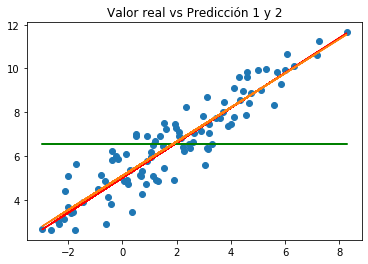

In [27]:
plt.plot(data["x"], data["y_act"], "o")
plt.plot(data["x"], data["y_pred"], color='red')
plt.plot(data["x"], data["y_mean"], "g")
plt.plot(data["x"], data["y_pred2"])
plt.title ("Valor real vs Predicción 1 y 2")
plt.show()

## Contraste de Hipótesis

### El P-valor y el Estadístico F

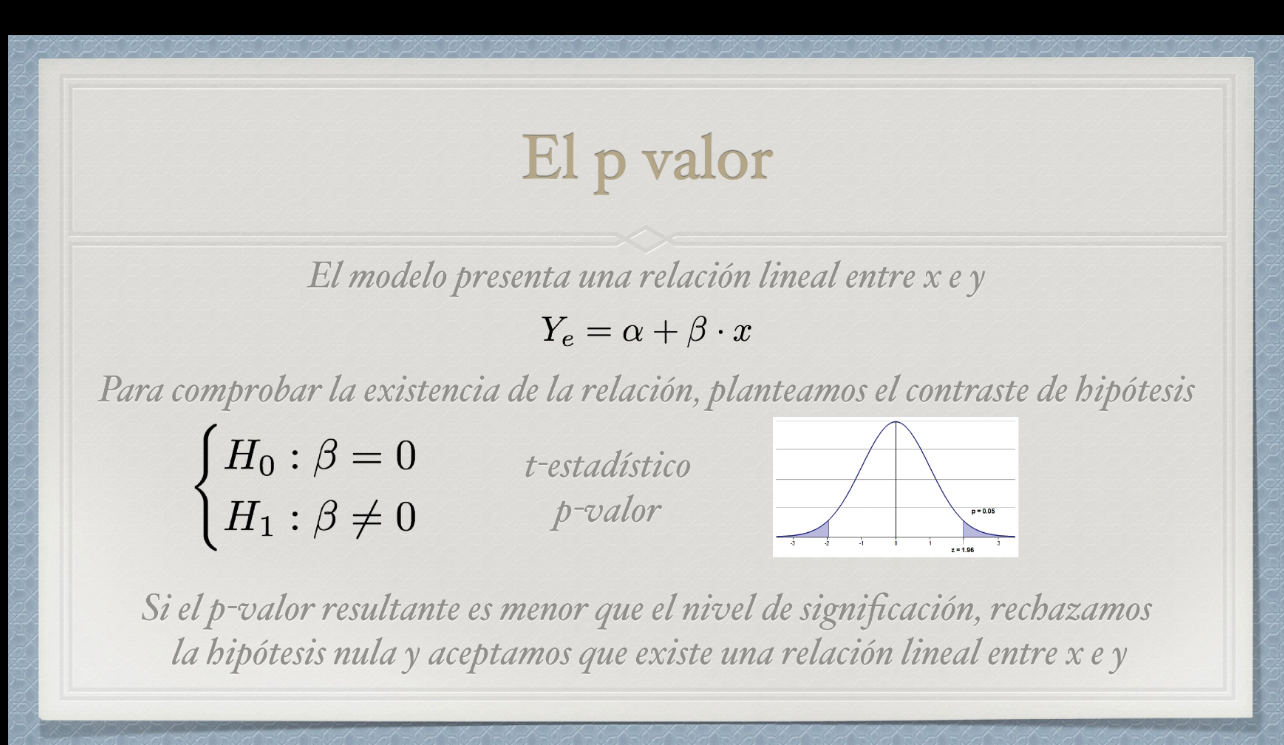

In [24]:
Image("./T4 - 2.png")

Lo que se pretende medir es la correlación entre la variable x de entrada y la que queremos predecir, esto es: si existe una correlación. En el caso de relaciones lineales esto vendría representado por beta diferente de cero. Un estudio de este valor lotengo en el notebook T4 - 1 1 p-value for linear regression.ipynb

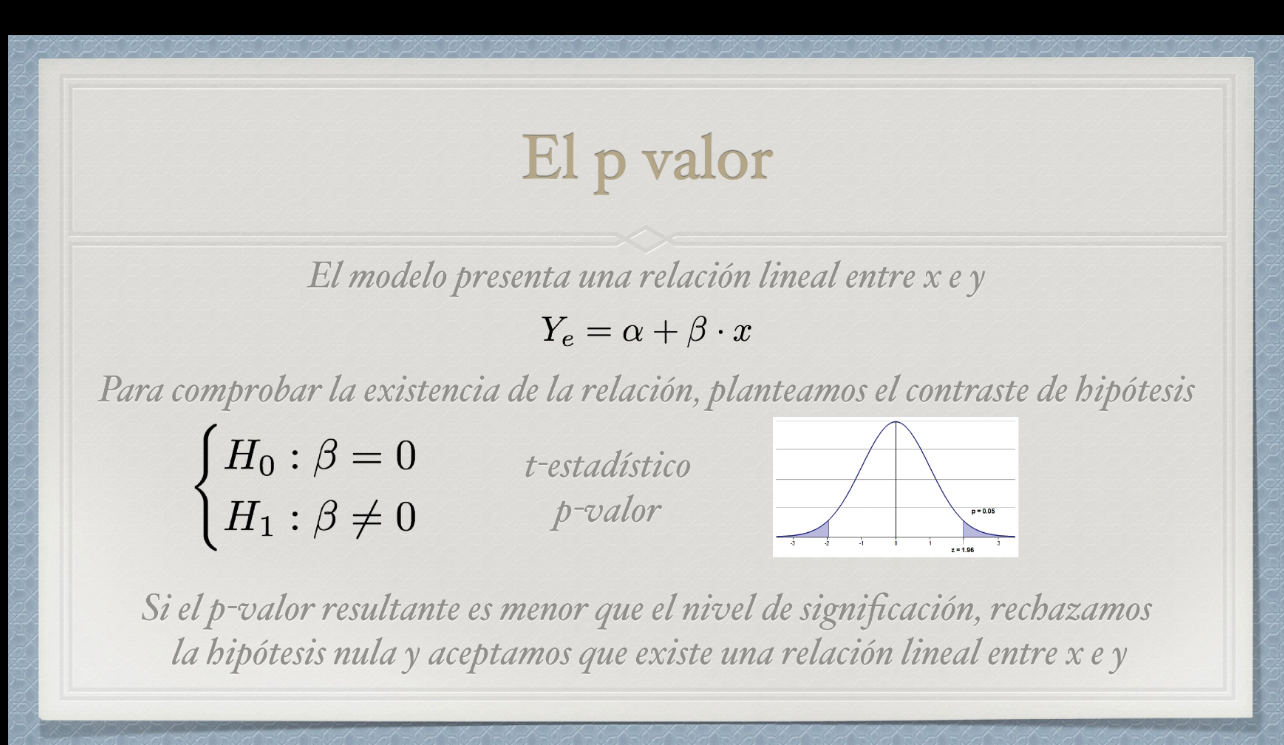

In [25]:
Image("./T4 - 2.png")

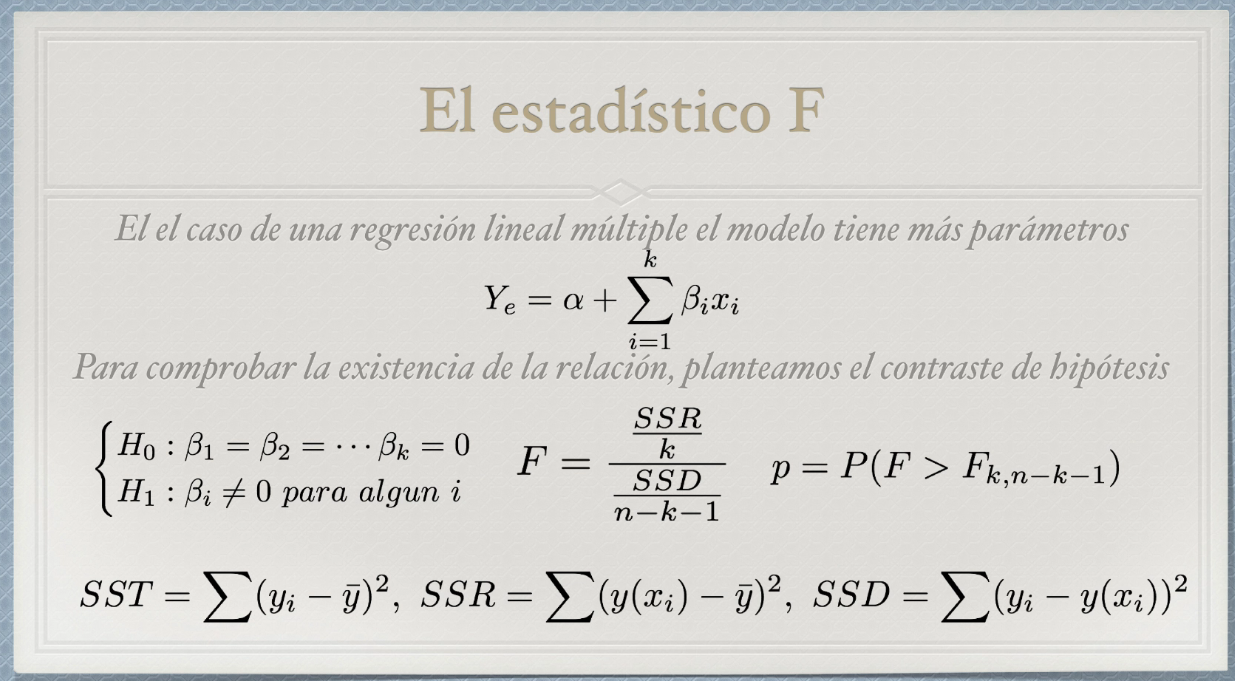

In [26]:
Image("./T4 - 3.png")

El estadístico F (F de Fischer) es lo mismo pero para el caso de múltiples variables, donde la hipótesis nula es que todos los beta son cero frente a la hipótesis alternativa de que al menos existe una distinta de cero.
- n es el número de filas (muestras) del dataset
- k es el número de variables a considerar

Otro estadístico que se podría considerar es el error estandar residual

## Recapitulando. 
En nuestro ejemplo teníamos


In [36]:
data[["x", "y_act", "y_pred", "y_mean"]].head()

,x,y_act,y_pred,y_mean
0,0.864627,4.737747,5.691702,6.566755
1,2.981808,7.843761,7.385447,6.566755
2,1.501538,6.435839,6.201230,6.566755
3,2.593763,6.654989,7.075010,6.566755
4,-0.231420,6.004014,4.814864,6.566755


In [28]:
SSR, SSD, SST

(402.2205249449773, 68.88447031823246, 451.57483739806787)

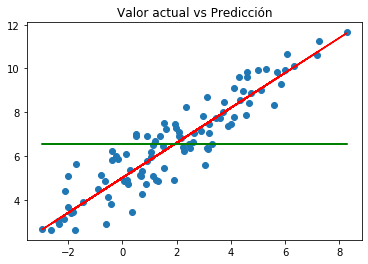

In [32]:
plt.plot(data["x"], data["y_act"], "o")
plt.plot(data["x"], data["y_pred"], color='red')
plt.plot(data["x"], data["y_mean"], "g")
plt.title ("Valor actual vs Predicción")
plt.show()

### Error estandar de los residuos (RSE)

In [41]:
# Calculo el error
RSE = np.sqrt(SSD/(len(data)-2))
# Y el porcentaje contra la media
PC = RSE / np.mean(data["y_act"])

RSE, f"{PC*100} %"

(0.838392961772289, '12.767233363255812 %')